In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
entrenamiento = pd.read_csv('/home/federico/Git/datos-TP1-Pandas-2c2020/data/original/Entrenamiento.csv')

In [3]:
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [4]:
aprobacion = entrenamiento.pivot_table(index = ['Bureaucratic_Code_0_Approval'], 
                                       columns = 'Stage', aggfunc = 'size', fill_value = 0)

In [5]:
aprobacion

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Bureaucratic_Code_0_Approval,,,,,
0,2961,5928,0,0,0
1,4389,3605,18,35,11


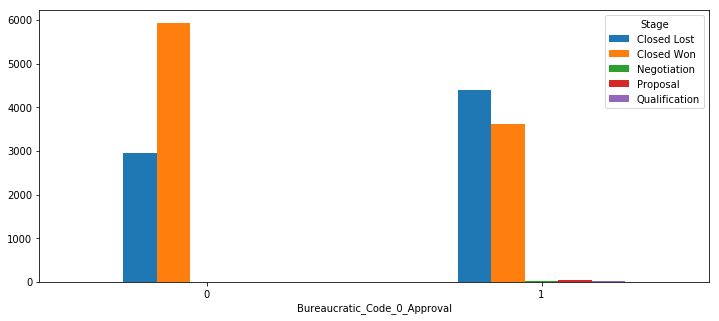

In [6]:
aprobacion.plot.bar(rot = 0, figsize = (12,5))

In [7]:
aprobados = entrenamiento.pivot_table(index = ['Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved'], 
                                       columns = 'Stage', aggfunc = 'size', fill_value = 0)

In [8]:
aprobados

Stage                                                      Closed Lost  \
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved                
0                            0                                    2961   
1                            0                                    1846   
                             1                                    2543   

Stage                                                      Closed Won  \
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved               
0                            0                                   5928   
1                            0                                    787   
                             1                                   2818   

Stage                                                      Negotiation  \
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved                
0                            0                                       0   
1                            0                                       1   
                             1                                      17   

Stage                                                      Proposal  \
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved             
0                            0                                    0   
1                            0                                    9   
                             1                                   26   

Stage                                                      Qualification  
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved                 
0                            0                                         0  
1                            0                                        11  
                             1                                         0

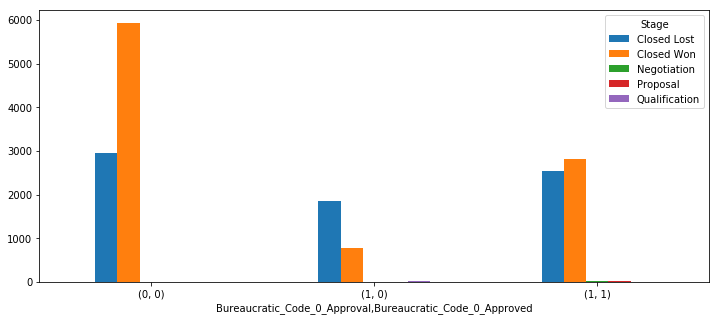

In [9]:
aprobados.plot.bar(rot = 0, figsize = (12,5))

In [10]:
aprobacion.sum(axis = 1)

Bureaucratic_Code_0_Approval
0    8889
1    8058
dtype: int64

In [11]:
aprobados.sum(axis = 1)

Bureaucratic_Code_0_Approval  Bureaucratic_Code_0_Approved
0                             0                               8889
1                             0                               2654
                              1                               5404
dtype: int64

In [12]:
submitidos = entrenamiento.pivot_table(index = ['Bureaucratic_Code_0_Approval', 'Submitted_for_Approval',
             'Bureaucratic_Code_0_Approved'], columns = 'Stage', aggfunc = 'size', fill_value = 0)

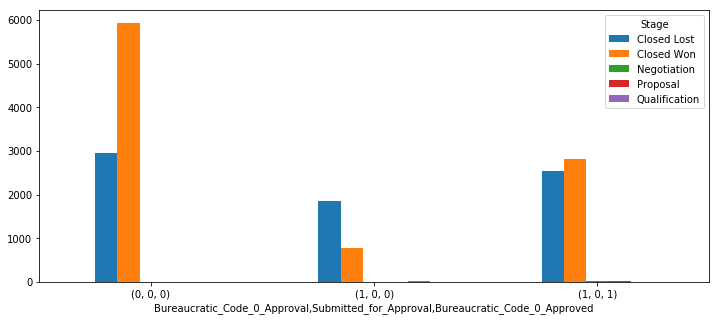

In [13]:
submitidos.plot.bar(rot = 0, figsize = (12, 5))

In [14]:
submitidos

Stage                                                                             Closed Lost  \
Bureaucratic_Code_0_Approval Submitted_for_Approval Bureaucratic_Code_0_Approved                
0                            0                      0                                    2961   
1                            0                      0                                    1846   
                                                    1                                    2543   

Stage                                                                             Closed Won  \
Bureaucratic_Code_0_Approval Submitted_for_Approval Bureaucratic_Code_0_Approved               
0                            0                      0                                   5928   
1                            0                      0                                    787   
                                                    1                                   2818   

Stage                                                                             Negotiation  \
Bureaucratic_Code_0_Approval Submitted_for_Approval Bureaucratic_Code_0_Approved                
0                            0                      0                                       0   
1                            0                      0                                       1   
                                                    1                                      17   

Stage                                                                             Proposal  \
Bureaucratic_Code_0_Approval Submitted_for_Approval Bureaucratic_Code_0_Approved             
0                            0                      0                                    0   
1                            0                      0                                    9   
                                                    1                                   26   

Stage                                                                             Qualification  
Bureaucratic_Code_0_Approval Submitted_for_Approval Bureaucratic_Code_0_Approved                 
0                            0                      0                                         0  
1                            0                      0                                        11  
                                                    1                                         0

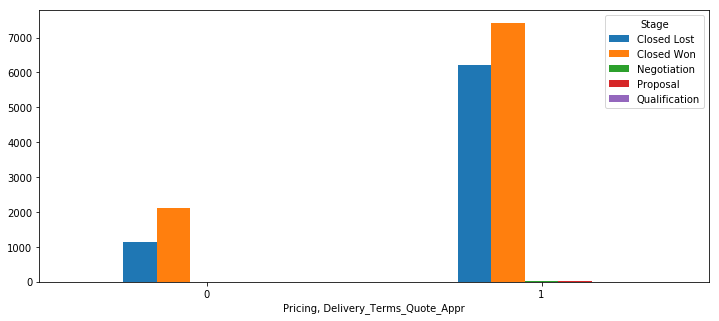

In [15]:
aprobacion_precios = entrenamiento.pivot_table(index = ['Pricing, Delivery_Terms_Quote_Appr'],
                                       columns = 'Stage', aggfunc = 'size', fill_value = 0)

aprobacion_precios.plot.bar(rot = 0, figsize = (12,5))

In [16]:
aprobacion_precios

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
"Pricing, Delivery_Terms_Quote_Appr",,,,,
0,1136,2118,0,0,0
1,6214,7415,18,35,11


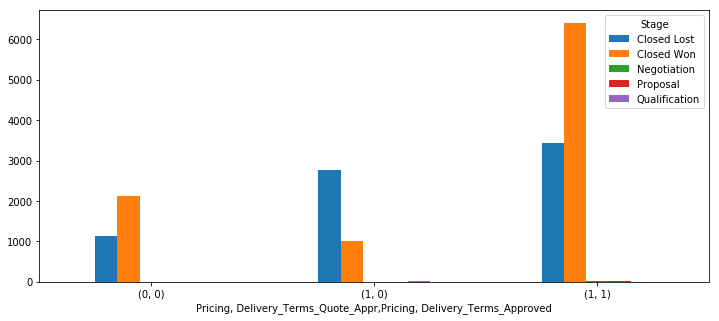

In [17]:
aprobados_precios = entrenamiento.pivot_table(
    index = ['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved'], 
    columns = 'Stage', aggfunc = 'size', fill_value = 0)
aprobados_precios.plot.bar(rot = 0, figsize = (12,5))

In [18]:
aprobados_precios

Stage                                                                Closed Lost  \
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved                
0                                  0                                        1136   
1                                  0                                        2771   
                                   1                                        3443   

Stage                                                                Closed Won  \
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved               
0                                  0                                       2118   
1                                  0                                       1011   
                                   1                                       6404   

Stage                                                                Negotiation  \
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved                
0                                  0                                           0   
1                                  0                                           1   
                                   1                                          17   

Stage                                                                Proposal  \
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved             
0                                  0                                        0   
1                                  0                                        9   
                                   1                                       26   

Stage                                                                Qualification  
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved                 
0                                  0                                             0  
1                                  0                                            11  
                                   1                                             0

In [19]:
aprobados_precios = aprobados_precios[['Closed Lost', 'Closed Won']]
aprobados_precios

Stage                                                                Closed Lost  \
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved                
0                                  0                                        1136   
1                                  0                                        2771   
                                   1                                        3443   

Stage                                                                Closed Won  
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved              
0                                  0                                       2118  
1                                  0                                       1011  
                                   1                                       6404

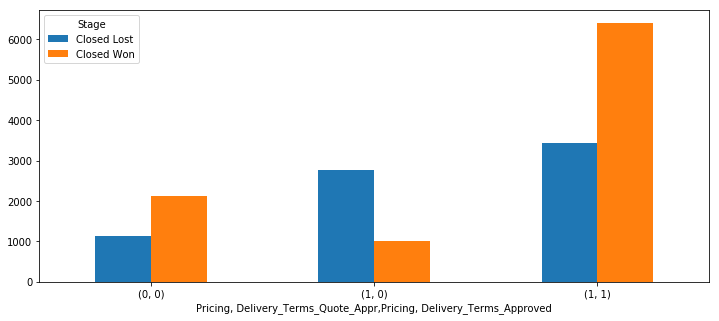

In [20]:
aprobados_precios.plot.bar(rot = 0, figsize = (12,5))

In [21]:
g = aprobados_precios.reset_index()
g.head()

Stage,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Closed Lost,Closed Won
0,0,0,1136,2118
1,1,0,2771,1011
2,1,1,3443,6404


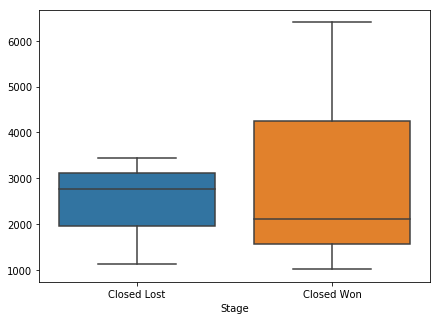

In [22]:
plt.subplots(figsize=(7,5))
sns.boxplot(data=aprobados_precios[['Closed Lost', 'Closed Won']])

In [42]:
aprobados_precios.reset_index()

Stage,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Closed Lost,Closed Won
0,0,0,1136,2118
1,1,0,2771,1011
2,1,1,3443,6404


In [118]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["No necesita aprobacion", \
               "Necesita aprobacion", \
              "No fue aprobada",\
              "Fue aprobada",\
              "Closed Won",\
              "Closed Lost"],
      color = "blue"
    ),
    link = dict(
      source = [0, 0, 1, 1],
      target = [4, 5, 4, 5],
      value = [2118,\
               1136,\
              1011+6404,\
              2771+3443]
  ))])

fig.update_layout(title_text="Cómo se relaciona la necesidad de aprobacion del precio de la oportunidad al resultado", font_size=10)
fig.show()

In [120]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
            label = ["No necesita aprobacion", \
               "Necesita aprobacion", \
              "No fue aprobada",\
              "Fue aprobada",\
              "Closed Won",\
              "Closed Lost"],
      color = "blue"
    ),
    link = dict(
      source = [2, 2, 3, 3],
      target = [4, 5, 4, 5],
      value = [1011,\
               2771,\
              6404,\
              3443]
  ))])

fig.update_layout(title_text="Cómo afecta la aprobación del precio de la oportunidad al resultado de la misma", font_size=10)
fig.show()

In [109]:
entrenamiento[['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Stage']]\
    .loc[entrenamiento[['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Stage']]\
        ['Stage'].isin(['Closed Won', 'Closed Lost'])]\
    .groupby(['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved']).count()

Stage
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved       
0                                  0                                  3254
1                                  0                                  3782
                                   1                                  9847

In [122]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
       label = ["No necesita aprobacion", \
               "Necesita aprobacion", \
               "No fue aprobada",\
               "Fue aprobada",\
               "Closed Won",\
               "Closed Lost"],
      color = "blue"
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3],
      target = [2, 3, 2, 3, 4, 5, 4, 5],
      value = [0,\
               3254,\
              3782,\
              9847,\
              1011,\
              2771,\
              6404,\
              3443]
  ))])

fig.update_layout(title_text="Flujo de cómo la decisión, de si el precio de una oportunidad necesita aprobación o no, afecta al resultado de la misma", font_size=10)
fig.show()